# Clustering Unsupervised Assignment

Author : @mohameddhameem

Date : 2022-02-02

## Problem Statement

Comany XYZ is looking to find potential customers for their new product. They have a large data set of customers who have purchased products using Credit Card.
XYZ now wants to find out which customers are most likely to purchase XYZ's product.

The goal is to segment the customers into groups based on their credit card usage and assign each customer to a group. With this assignment we will help to create clusters and present findings. The business team will assign appropriate name for each of the clusters.

## Data Set

The dataset is downloaded from Kaggle. - https//www.kaggle.com/arjunbhasin2013/ccdata#

The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

### Data Set description

The dataset contains the following features:


| Variable Name | Description |
| --- | --- |
CUSTID | Identification of Credit Card holder (Categorical)
BALANCE | Balance amount left in their account to make purchases (
BALANCEFREQUENCY | How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
PURCHASES | Amount of purchases made from account
ONEOFFPURCHASES | Maximum purchase amount done in one-go
INSTALLMENTSPURCHASES | Amount of purchase done in installment
CASHADVANCE | Cash in advance given by the user
PURCHASESFREQUENCY | How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
ONEOFFPURCHASESFREQUENCY | How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
PURCHASESINSTALLMENTSFREQUENCY | How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
CASHADVANCEFREQUENCY | How frequently the cash in advance being paid
CASHADVANCETRX | Number of Transactions made with "Cash in Advanced"
PURCHASESTRX | Numbe of purchase transactions made
CREDITLIMIT | Limit of Credit Card for user
PAYMENTS | Amount of Payment done by user
MINIMUM_PAYMENTS | Minimum amount of payments made by user
PRCFULLPAYMENT | Percent of full payment paid by user
TENURE | Tenure of credit card service for user

## Data Exploration

In [1]:
# lets import all the libraries we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns

# for feature engineering
from scipy.special import boxcox1p
from sklearn.cluster import KMeans

In [2]:
plt.rcParams['figure.figsize'] = [6,6]
sns.set_style("whitegrid")
sns.set_context("talk")

In [3]:
# lets read the dataset
dataset = pd.read_csv('Data_CC_GENERAL.csv')

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
# lets check missing values
dataset.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
# there are 2 columns with missing values
# lets check the distribution of the data
dataset.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [7]:
dataset.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [8]:
# lets impute the missing values
# for the column 'MINIMUM_PAYMENTS' lets impute with 0
dataset['MINIMUM_PAYMENTS'].fillna(0, inplace=True)
# for the colmun 'CREDIT_LIMIT' lets impute with 50. This is the minimum value for the column. The reason for this is to choose the lowest possible credit limit.
dataset['CREDIT_LIMIT'].fillna(50, inplace=True)

array([[<AxesSubplot:title={'center':'BALANCE'}>,
        <AxesSubplot:title={'center':'BALANCE_FREQUENCY'}>,
        <AxesSubplot:title={'center':'PURCHASES'}>,
        <AxesSubplot:title={'center':'ONEOFF_PURCHASES'}>],
       [<AxesSubplot:title={'center':'INSTALLMENTS_PURCHASES'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE'}>,
        <AxesSubplot:title={'center':'PURCHASES_FREQUENCY'}>,
        <AxesSubplot:title={'center':'ONEOFF_PURCHASES_FREQUENCY'}>],
       [<AxesSubplot:title={'center':'PURCHASES_INSTALLMENTS_FREQUENCY'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE_FREQUENCY'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE_TRX'}>,
        <AxesSubplot:title={'center':'PURCHASES_TRX'}>],
       [<AxesSubplot:title={'center':'CREDIT_LIMIT'}>,
        <AxesSubplot:title={'center':'PAYMENTS'}>,
        <AxesSubplot:title={'center':'MINIMUM_PAYMENTS'}>,
        <AxesSubplot:title={'center':'PRC_FULL_PAYMENT'}>],
       [<AxesSubplot:title={'center':'TENURE'

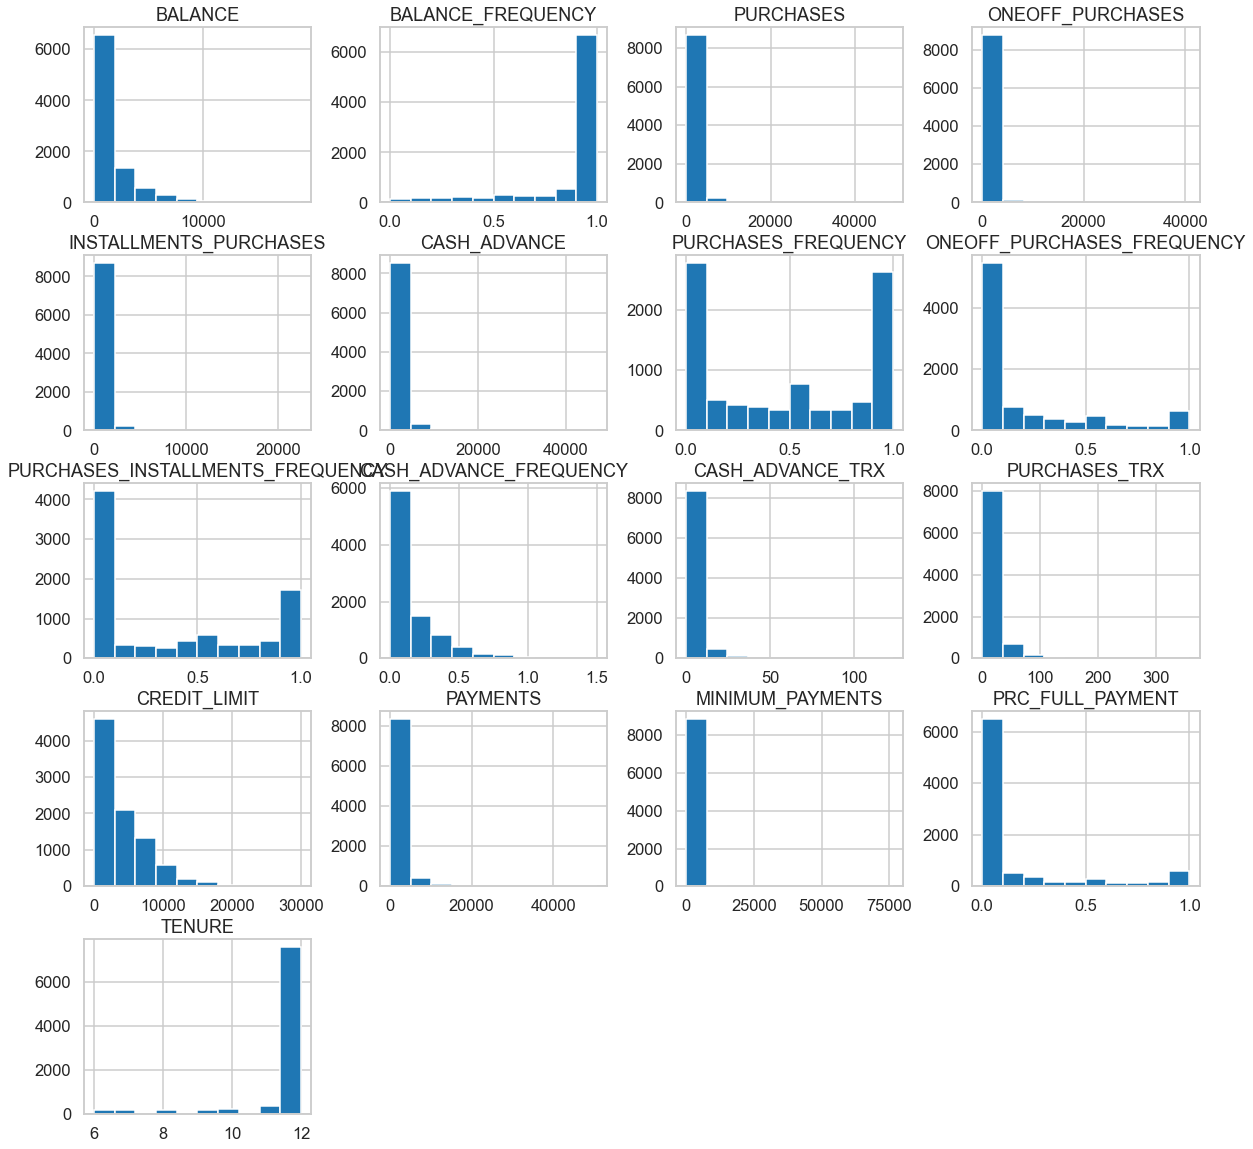

In [9]:
# Lets try to plot the data distribution for all the columns
dataset.hist(figsize=(20, 20))


From the above plot we could see some skew in the data. During our feature engineering we will try to remove the skew.

### Identify skweness in the data

In [10]:
# utils function to identify skewness
def skewness(data):
    # create a mask for the data with datatype float and integer
    # mask = data.dtypes == np.float64 or data.dtypes == np.int64 or data.dtypes == np.int32 or data.dtypes == np.int16 or data.dtypes == np.int8 or data.dtypes == np.int 
    mask = (data.dtypes == np.float64) | (data.dtypes == np.int64)
    float_cols = data.columns[mask]

    skew_limit = 0.75 # define a limit above which we will log transform
    skew_vals = data[float_cols].skew()
    # Showing the skewed columns
    skew_cols = (skew_vals
                .sort_values(ascending=False)
                .to_frame()
                .rename(columns={0:'Skew'})
                .query('abs(Skew) > {}'.format(skew_limit)))

    print('Number of skewed columns :', skew_cols.shape[0])
    return skew_cols

In [11]:
skew_cols = skewness(dataset)
skew_cols

Number of skewed columns : 15


,Skew
MINIMUM_PAYMENTS,13.808430
ONEOFF_PURCHASES,10.045083
PURCHASES,8.144269
INSTALLMENTS_PURCHASES,7.299120
PAYMENTS,5.907620
CASH_ADVANCE_TRX,5.721298
CASH_ADVANCE,5.166609
PURCHASES_TRX,4.630655
BALANCE,2.393386
PRC_FULL_PAYMENT,1.942820


## Feature Engineering

In [12]:
# remove unwanted columns from the dataset. Customer ID is not needed
dataset.drop(['CUST_ID'], axis=1, inplace=True)

### Remove Skew with boxcox1p transformation

In [13]:
# to remove the skewness we will use boxcox transformation
for col in skew_cols.index:
    # apply boxcox1p transformation
    dataset[col] = boxcox1p(dataset[col], 0.15)

### Scaling the data with RobustScaler

In [14]:
# Robust scaling
from sklearn.preprocessing import RobustScaler
scalar = RobustScaler()
# get the mask for float and integer columns
mask = (dataset.dtypes == np.float64) | (dataset.dtypes == np.int64)
float_cols = dataset.columns[mask]
dataset[float_cols] = scalar.fit_transform(dataset[float_cols])

## Model Building

### K-Means Clustering

#### Lets apply PCA to reduce the dimensionality of the data

In [15]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
dataset_pca = pca.fit_transform(dataset)

In [16]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'
    alpha = 0.5
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

In [17]:
# Lets try to find optimal number of clusters using elbow method
# lets define a function that will help us to find the optimal number of clusters
def elbow_method(X, max_clusters=20):
    # define a list to store the values of the inertia
    inertias = []
    # loop through the number of clusters
    for i in range(1, max_clusters):
        # create a KMeans object
        km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
        # fit the data to the KMeans object
        km.fit(X)
        # append the value of the inertia to the list
        inertias.append(km.inertia_)
    # plot the values of the inertia
    plt.plot(range(1, max_clusters), inertias, 'bx-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow method')
    plt.show()

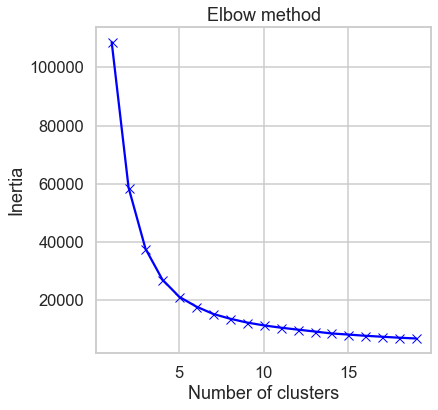

In [18]:
elbow_method(dataset_pca)

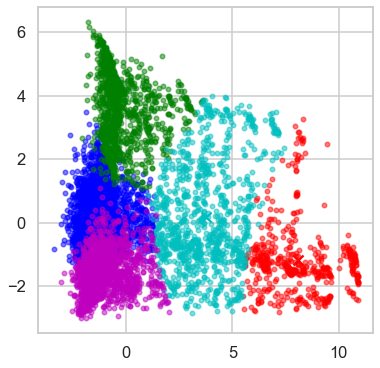

In [19]:
# Lets take 5 clusters as the optimal number of clusters
num_clusters = 5
km = KMeans(n_clusters=num_clusters, init='k-means++', n_init=10, max_iter=300, random_state=0)
# fit the data to the KMeans object
km.fit(dataset_pca)
# Lets plot the data
display_cluster(dataset_pca,km,num_clusters)

From the above plot we can see the K-Means clustering is able to cluster the data into 5 clusters.

### Visualize the clusters

In [36]:
# vizualize the clusters
# lets create a dataframe with the cluster labels
cluster_labels = pd.DataFrame(km.labels_)
# lets rename the column
cluster_labels.columns = ['CLUSTER_LABELS']
# lets merge the cluster labels with the dataset
dataset_clustered = pd.concat([dataset,cluster_labels],axis=1)
# lets check the cluster labels
dataset_clustered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER_LABELS
0,-0.948107,-1.662719,-0.389159,-0.458874,0.013416,0.000000,-0.399999,-0.300920,-0.111112,0.000000,0.00000,-0.431459,-0.713276,-0.809369,-0.423306,0.000000,0.0,4
1,0.557005,-0.814527,-1.267909,-0.458874,-0.635738,1.462487,-0.600000,-0.300920,-0.222223,1.113875,1.00000,-0.845039,0.636460,1.101017,0.887298,1.510416,0.0,4
2,0.441399,0.000000,0.260677,0.613826,-0.635738,0.000000,0.600000,2.428811,-0.222223,0.000000,0.00000,0.238237,0.691938,-0.194888,0.502451,0.000000,0.0,0
3,0.263423,-3.473316,0.513229,0.791058,-0.635738,0.656935,-0.500000,0.000000,-0.222223,0.395270,0.40128,-0.592087,0.691938,-2.649953,-2.348149,0.000000,0.0,3
4,-0.025435,0.000000,-0.795142,-0.127105,-0.635738,0.000000,-0.500000,0.000000,-0.222223,0.000000,0.00000,-0.592087,-0.602916,-0.143123,-0.101730,0.000000,0.0,4


In [ ]:
# reference : https://www.kaggle.com/sabanasimbutt/clustering-visualization-of-clusters-using-pca

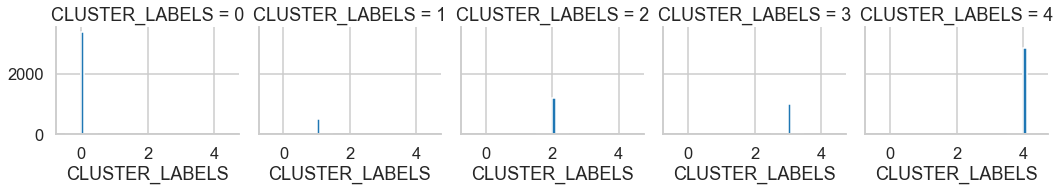

In [37]:
for c in cluster_labels:
    grid= sns.FacetGrid(cluster_labels, col='CLUSTER_LABELS')
    grid.map(plt.hist, c)

## Hierarchical Agglomerative Clustering

In [33]:
# hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='ward')

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='euclidean', linkage='ward')

model = model.fit(dataset)


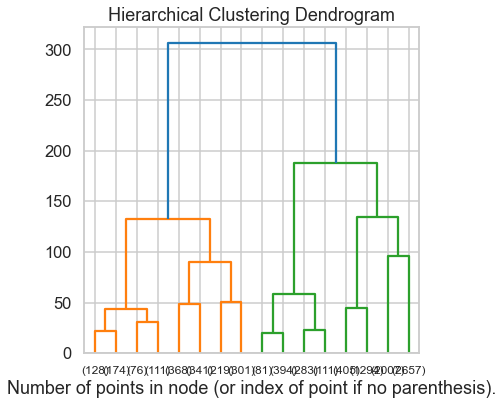

In [34]:
# Lets plot the dentogram
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

## DBScan Clustering

In [35]:
# use DBSCAN to cluster the data
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(dataset_pca)

## Mean-Shift Clustering

In [ ]:
# Mean shift clustering
from sklearn.cluster import MeanShift, estimate_bandwidth


In [ ]:
#